In [1]:
import pandas as pd
data_path = 'fake_job_postings.csv'
data = pd.read_csv(data_path)

In [2]:
# Display the first few rows of the dataframe
print(data.head())

   job_id                                      title            location  \
0       1                           Marketing Intern    US, NY, New York   
1       2  Customer Service - Cloud Video Production      NZ, , Auckland   
2       3    Commissioning Machinery Assistant (CMA)       US, IA, Wever   
3       4          Account Executive - Washington DC  US, DC, Washington   
4       5                        Bill Review Manager  US, FL, Fort Worth   

  department salary_range                                    company_profile  \
0  Marketing          NaN  We're Food52, and we've created a groundbreaki...   
1    Success          NaN  90 Seconds, the worlds Cloud Video Production ...   
2        NaN          NaN  Valor Services provides Workforce Solutions th...   
3      Sales          NaN  Our passion for improving quality of life thro...   
4        NaN          NaN  SpotSource Solutions LLC is a Global Human Cap...   

                                         description  \
0  Foo

In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline

# Separate features and labels
X = data.drop('fraudulent', axis=1)
y = data['fraudulent']

# Fill missing values for numerical and categorical data
num_cols = X.select_dtypes(include=['int64', 'float64']).columns
cat_cols = X.select_dtypes(include=['object']).columns

numerical_transformer = SimpleImputer(strategy='mean')
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, num_cols),
        ('cat', categorical_transformer, cat_cols)
    ]
)

# Preprocess the data
X_preprocessed = preprocessor.fit_transform(X)

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_preprocessed, y, test_size=0.2, random_state=42)


Step 2: Resampling with SMOTE
Now, apply SMOTE to the training data to handle the class imbalance:

In [4]:
from imblearn.over_sampling import SMOTE
import numpy as np

smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)
# Count the number of instances in each class
unique, counts = np.unique(y_train_resampled, return_counts=True)
class_counts = dict(zip(unique, counts))

print(class_counts)

{0: 13619, 1: 13619}


Import SMOTE from imblearn: The SMOTE class is imported from the imblearn.over_sampling module. imblearn (imbalanced-learn) is a library specifically designed to handle imbalanced datasets.

Initialize SMOTE: SMOTE(random_state=42) creates an instance of the SMOTE class. The random_state parameter ensures reproducibility of your results by setting a seed for the random number generator used in the algorithm.

Fit and Resample: The fit_resample method is used on the training data (X_train, y_train). This method performs the following actions:

Fit: SMOTE fits to the minority class (fraudulent postings) in the training data to understand its distribution.
Resample: Based on the learned distribution, it generates synthetic samples to increase the number of instances in the minority class.
Output: The method returns two new sets:

X_train_resampled: The feature set containing the original training features along with the new synthetic samples for the minority class.
y_train_resampled: The corresponding labels for X_train_resampled, including the labels for the synthetic samples.
How SMOTE Generates Synthetic Samples
SMOTE works by selecting instances from the minority class and then generating synthetic examples that are similar, but not identical, to these existing instances. It does this by finding the k-nearest neighbors for a minority class instance and then creating synthetic points that lie on the line segment between the instance and its neighbors. This process increases the number of minority class instances, leading to a more balanced dataset.

Purpose
The main goal of using SMOTE in this context is to create a balanced class distribution, which can improve the performance of the neural network model by preventing it from being overly biased towards the majority class. By balancing the dataset, the model is encouraged to learn more about the minority class (fraudulent postings) and thus potentially improving its ability to identify fraudulent cases.

## Step 3: Build and Train the Neural Network

With the preprocessed and balanced data, you can build and train your neural network:

In [9]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Define the model
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train_resampled.shape[1],)),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train_resampled, y_train_resampled, epochs=10, batch_size=32)

Epoch 1/10


C:\Users\tanle\miniconda3\envs\ie0005_23s2\Lib\site-packages\keras\src\layers\core\dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


852/852 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - accuracy: 0.6503 - loss: 1.5875
Epoch 2/10
852/852 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.8836 - loss: 0.3367
Epoch 3/10
852/852 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.9384 - loss: 0.1852
Epoch 4/10
852/852 ━━━━━━━━━━━━━━━━━━━━ 7s 8ms/step - accuracy: 0.9521 - loss: 0.2012
Epoch 5/10
852/852 ━━━━━━━━━━━━━━━━━━━━ 7s 8ms/step - accuracy: 0.9612 - loss: 0.1482
Epoch 6/10
852/852 ━━━━━━━━━━━━━━━━━━━━ 7s 8ms/step - accuracy: 0.9862 - loss: 0.0582
Epoch 7/10
852/852 ━━━━━━━━━━━━━━━━━━━━ 7s 8ms/step - accuracy: 0.9856 - loss: 0.0621
Epoch 8/10
852/852 ━━━━━━━━━━━━━━━━━━━━ 7s 8ms/step - accuracy: 0.9563 - loss: 0.1836
Epoch 9/10
852/852 ━━━━━━━━━━━━━━━━━━━━ 7s 8ms/step - accuracy: 0.9686 - loss: 0.1348
Epoch 10/10
852/852 ━━━━━━━━━━━━━━━━━━━━ 7s 8ms/step - accuracy: 0.9772 - loss: 0.0965


In [6]:
# Prepare the test data (scaling if necessary)
X_test_prepared = X_test  # assuming scaling is already handled in preprocessing

# Evaluate the model
evaluation = model.evaluate(X_test_prepared, y_test)

print(f'Test Loss: {evaluation[0]}')
print(f'Test Accuracy: {evaluation[1]}')

112/112 ━━━━━━━━━━━━━━━━━━━━ 0s 816us/step - accuracy: 0.9800 - loss: 0.0644
Test Loss: 0.06663041561841965
Test Accuracy: 0.9779082536697388


112/112 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


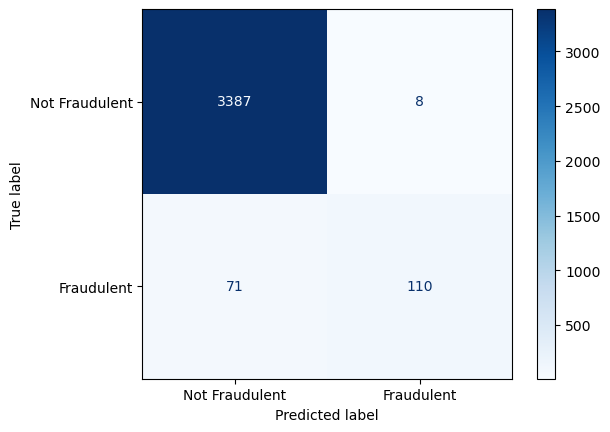

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Assuming X_test_prepared is your preprocessed test data and y_test are the true labels
y_pred = model.predict(X_test_prepared)
y_pred = np.round(y_pred).astype(int)  # Convert probabilities to binary predictions (0 or 1)

# Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Not Fraudulent', 'Fraudulent'])
disp.plot(cmap=plt.cm.Blues)
plt.show()

In [8]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Calculate metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Display metrics
print(f'Accuracy: {accuracy:.4f}')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1 Score: {f1:.4f}')

Accuracy: 0.9779
Precision: 0.9322
Recall: 0.6077
F1 Score: 0.7358
